# RealTime Image Denoising

In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

##  Detecting Noise

In [3]:
# from skimage import io           # Only needed for web grabbing images, use cv2.imread for local image
def is_valid(image):

    # Convert image to HSV color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate histogram of saturation channel
    s = cv2.calcHist([image], [1], None, [256], [0, 256])

    # Calculate percentage of pixels with saturation >= p
    p = 0.05
    s_perc = np.sum(s[int(p * 255):-1]) / np.prod(image.shape[0:2])

    ##### Just for visualization and debug; remove in final
    plt.plot(s)
    plt.plot([p * 255, p * 255], [0, np.max(s)], 'r')
    plt.text(p * 255 + 5, 0.9 * np.max(s), str(s_perc))
    plt.show()
    ##### Just for visualization and debug; remove in final

    # Percentage threshold; above: valid image, below: noise
    s_thr = 0.5
    return s_perc > s_thr

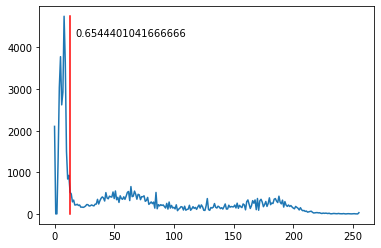

True


In [4]:
# Read example images; convert to grayscale
# noise2 = cv2.cvtColor(io.imread('https://i.stack.imgur.com/9ZPAj.jpg'), cv2.COLOR_RGB2BGR)
# valid = cv2.cvtColor(io.imread('https://i.stack.imgur.com/0FNPQ.jpg'), cv2.COLOR_RGB2BGR)

# for img in [noise1, noise2, valid]:
#     print(is_valid(img))

noise1 = cv2.cvtColor(cv2.imread('/content/WebRTCCapturesDataset/1.png'), cv2.COLOR_RGB2BGR)
print(is_valid(noise1))

## Add Noise To Images

In [13]:
img=cv2.imread("/content/WebRTCCapturesDataset/1.png",0)
print(img.shape)

(240, 320)


In [58]:
def showNoiseEffect(img, noiseyimg, noisetype, gn_img):
  fig=plt.figure(dpi=300)

  fig.add_subplot(1,3,1)
  plt.imshow(img,cmap='gray')
  plt.axis("off")
  plt.title("Original",  fontsize = 8)

  if(noiseyimg is not None):
    fig.add_subplot(1,3,2)
    plt.imshow(noiseyimg,cmap='gray')
    plt.axis("off")
    plt.title(noisetype,  fontsize = 8)

  fig.add_subplot(1,3,3)
  plt.imshow(gn_img,cmap='gray')
  plt.axis("off")
  plt.title("Noisy Image \n"+ noisetype, fontsize = 8)

### Gaussian Noise

In [59]:
gauss_noise=np.zeros((240,320),dtype=np.uint8) # create a zero image with the same dimensions of the original image
cv2.randn(gauss_noise,128,20)  # random distribution to determine the pixel values of the noise (here mean of 128 and a sigma of 20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

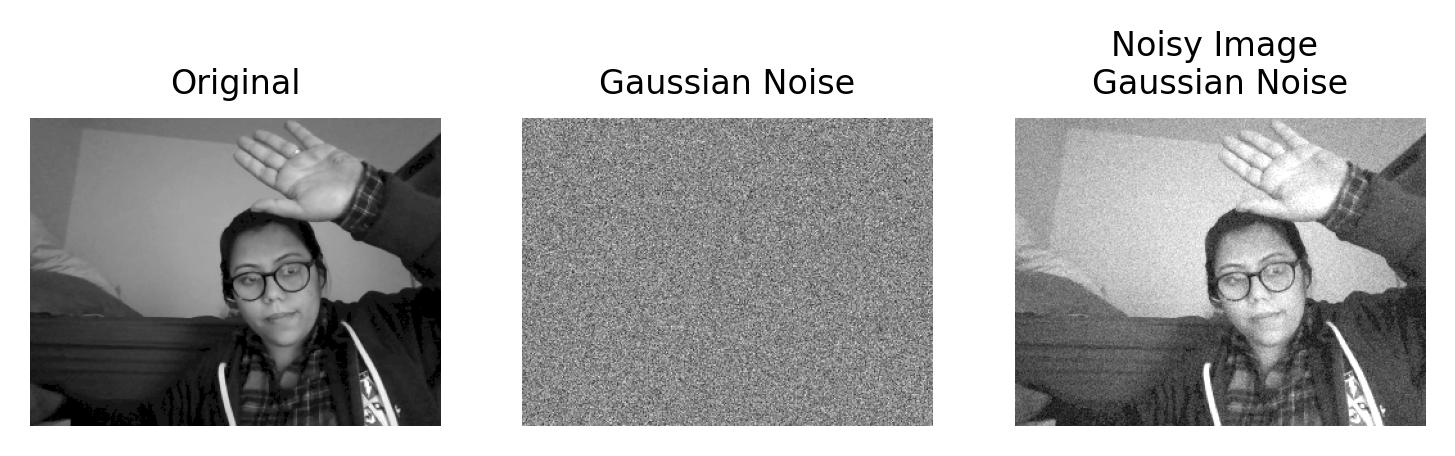

In [60]:
gn_img=cv2.add(img,gauss_noise)
showNoiseEffect(img, gauss_noise,"Gaussian Noise", gn_img)

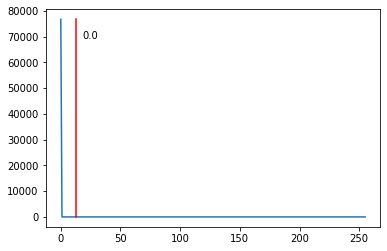

False


In [57]:
noise1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
print(is_valid(noise1))

# noise2 = cv2.cvtColor(un_img, cv2.COLOR_RGB2BGR)
# print(is_valid(noise2))

### Uniform Noise

Uniform noise is signal dependant 

It is caused by the quantization of the pixels of an image to a number of discrete levels. It is generally created when analog data is converted to digital form

In [27]:
uni_noise=np.zeros((240,320),dtype=np.uint8)
cv2.randu(uni_noise,0,255)
uni_noise=(uni_noise*0.5).astype(np.uint8)

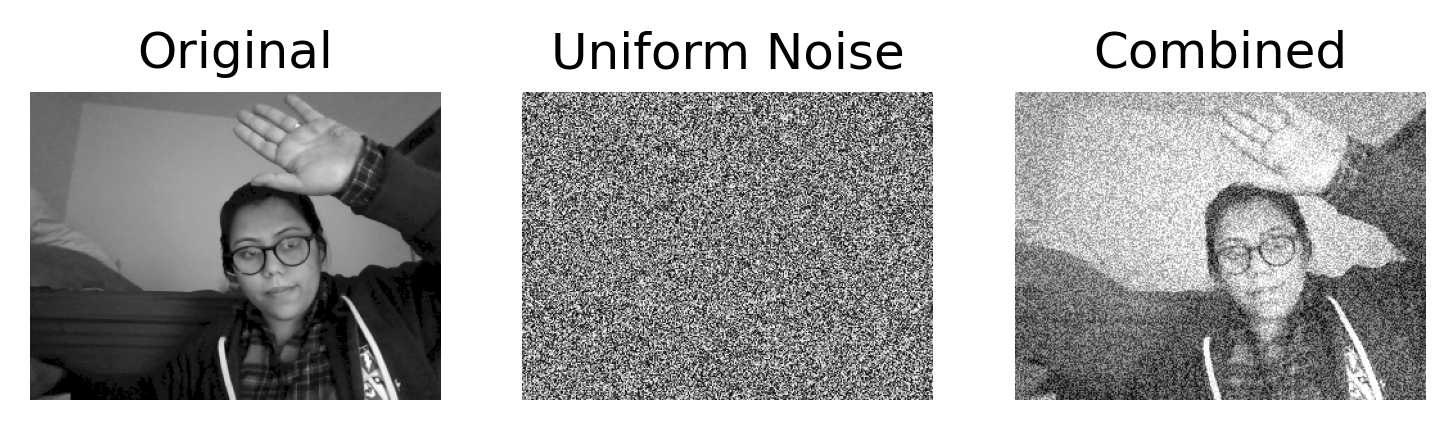

In [29]:
un_img=cv2.add(img,uni_noise)
showNoiseEffect(img, uni_noise,"Uniform Noise", un_img)

### Impulse Noise

"Salt and Pepper" noise is the sparse occurance of maximum (255) and minimum (0) pixel values in an image. This can be noticed as the presence of black pixels in bright regions and white pixels in dark regions. 
Caused by sudden disturbance in iomage signal such as erros in analog to digital conversion or bit

In [30]:
 # create a distribution similar to that used in Uniform noise and apply binary thresholding to create a grid of black and white pixels.
 # intensity of the noise can be easily altered by changing the threshold value.

imp_noise=np.zeros((240,320),dtype=np.uint8)
cv2.randu(imp_noise,0,255)
imp_noise=cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY)[1]

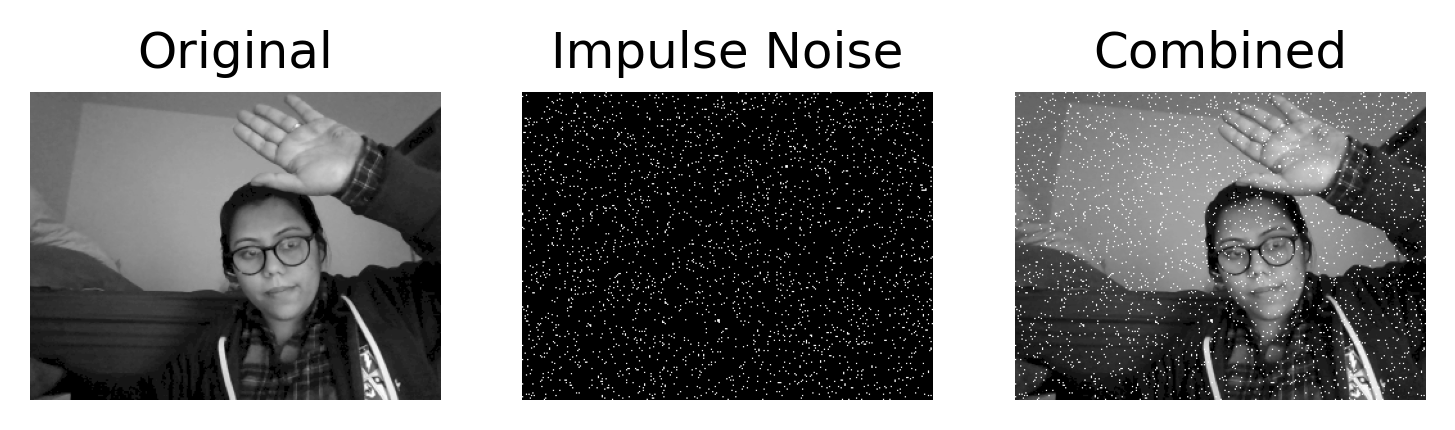

In [31]:
in_img=cv2.add(img,imp_noise)
showNoiseEffect(img, imp_noise,"Impulse Noise", in_img)

### Random Noise (Sckit Image)

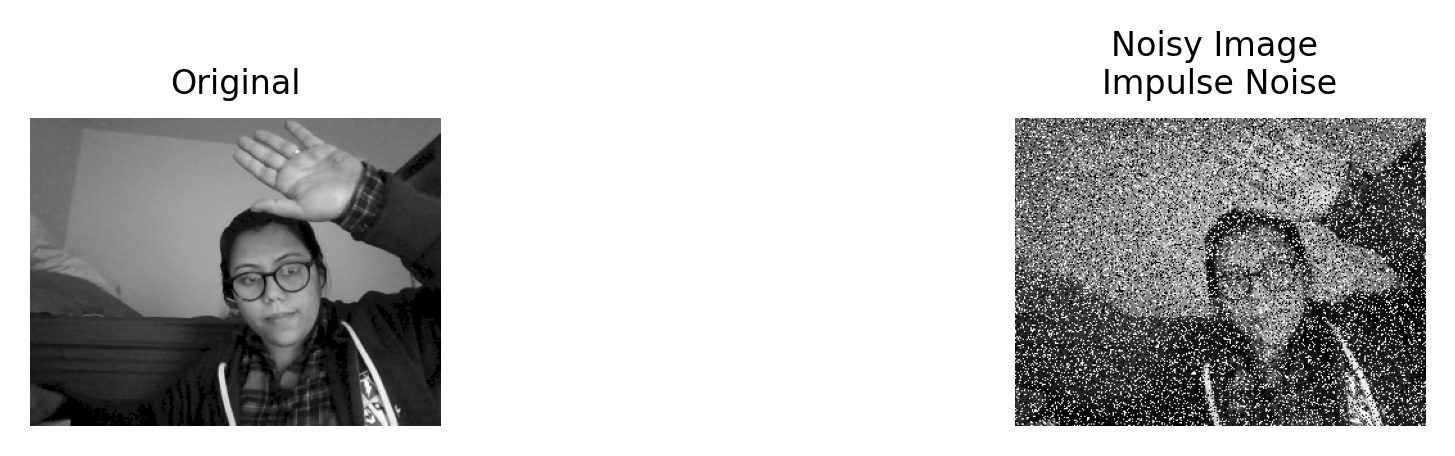

In [62]:
from skimage.util import random_noise

noise_img = random_noise(img, mode='s&p',amount=0.3)  # salt-and-pepper noise to the image.
noise_img = np.array(255*noise_img, dtype = 'uint8')

showNoiseEffect(img, None,"Salt and Pepper Noise", noise_img)

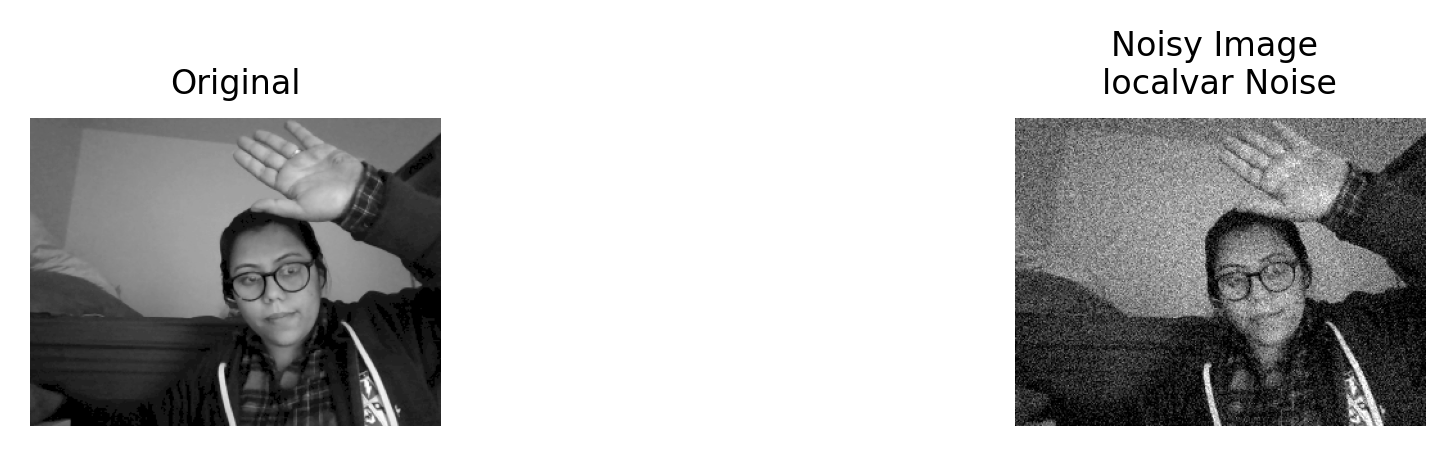

In [64]:
noise_img = random_noise(img, mode='localvar')  # salt-and-pepper noise to the image.
noise_img = np.array(255*noise_img, dtype = 'uint8')

showNoiseEffect(img, None,"localvar Noise", noise_img)

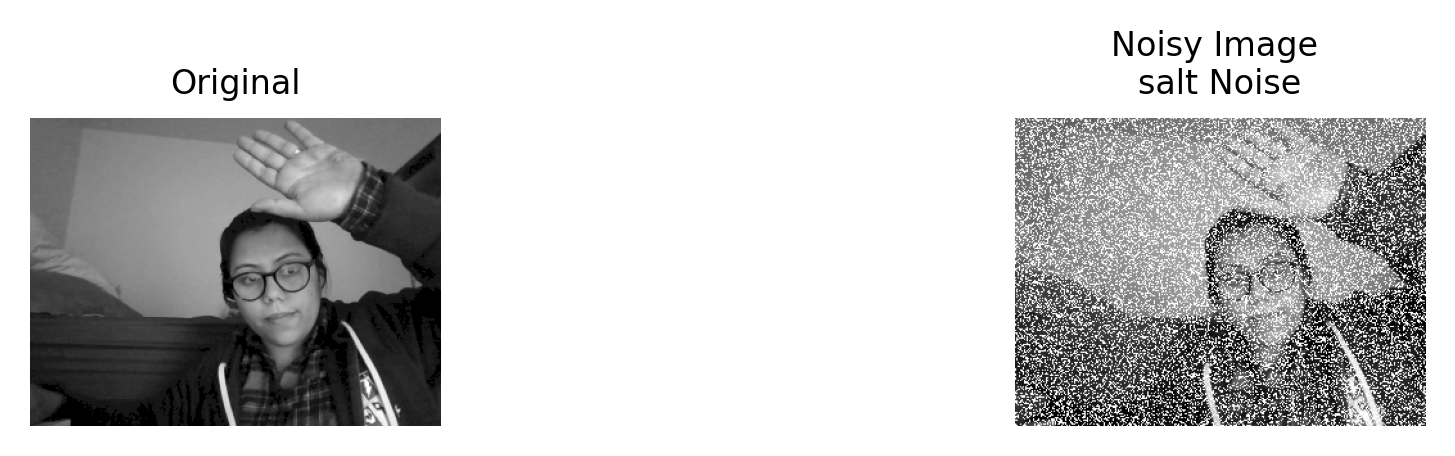

In [65]:
noise_img = random_noise(img, mode='salt',amount=0.3)  # salt-and-pepper noise to the image.
noise_img = np.array(255*noise_img, dtype = 'uint8')

showNoiseEffect(img, None,"salt Noise", noise_img)

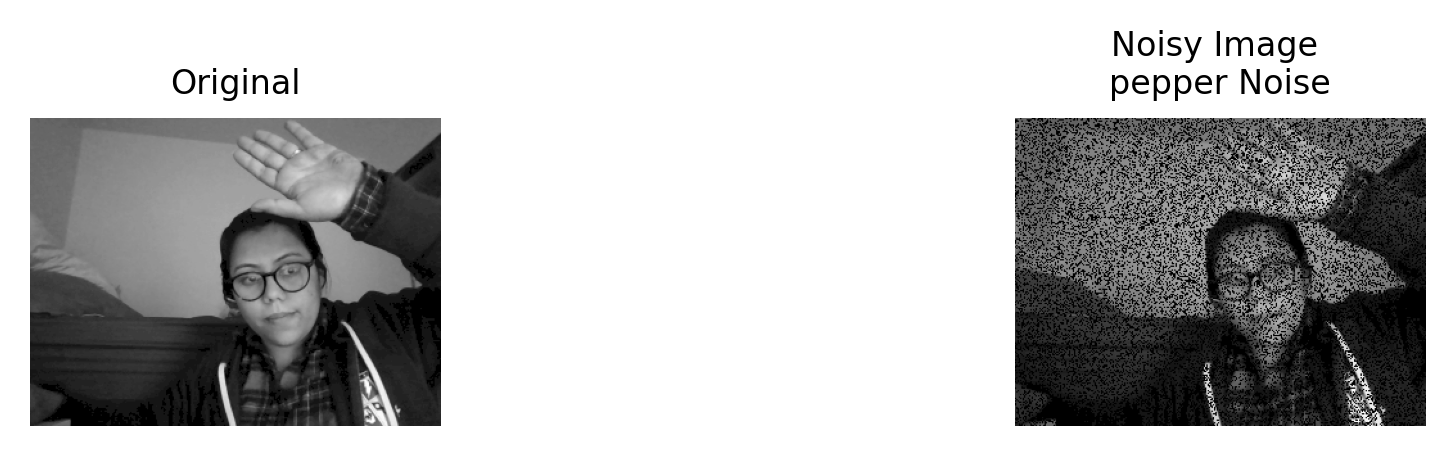

In [66]:
noise_img = random_noise(img, mode='pepper',amount=0.3)  # salt-and-pepper noise to the image.
noise_img = np.array(255*noise_img, dtype = 'uint8')

showNoiseEffect(img, None,"pepper Noise", noise_img)

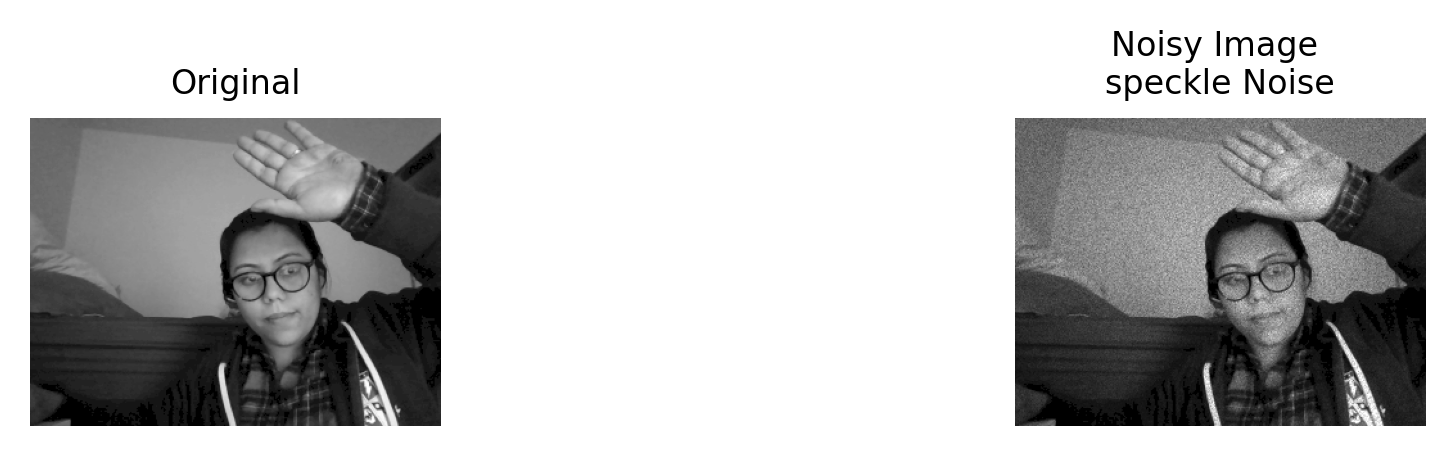

In [68]:
noise_img = random_noise(img, mode='speckle')  # salt-and-pepper noise to the image.
noise_img = np.array(255*noise_img, dtype = 'uint8')

showNoiseEffect(img, None,"speckle Noise", noise_img)

# Image Denoising

In [49]:
def denoising(img, noisygnimg, noisetype, denoisedimg, denoisingtech="" ):
  fig=plt.figure(dpi=300)
  
  fig.add_subplot(1,3,1)
  plt.imshow(img,cmap='gray')
  plt.axis("off")
  plt.title("Original", fontsize = 8)

  fig.add_subplot(1,3,2)
  plt.imshow(noisygnimg,cmap='gray')
  plt.axis("off")
  plt.title(noisetype, fontsize = 8)

  fig.add_subplot(1,3,3)
  plt.imshow(denoisedimg,cmap='gray')
  plt.axis("off")
  plt.title("After Denoising\n"+ denoisingtech, fontsize = 8)

##  fastNlMeansDenoising

Non-local Means Denoising algorithm, and expects greyscale image with Gaussian white noise

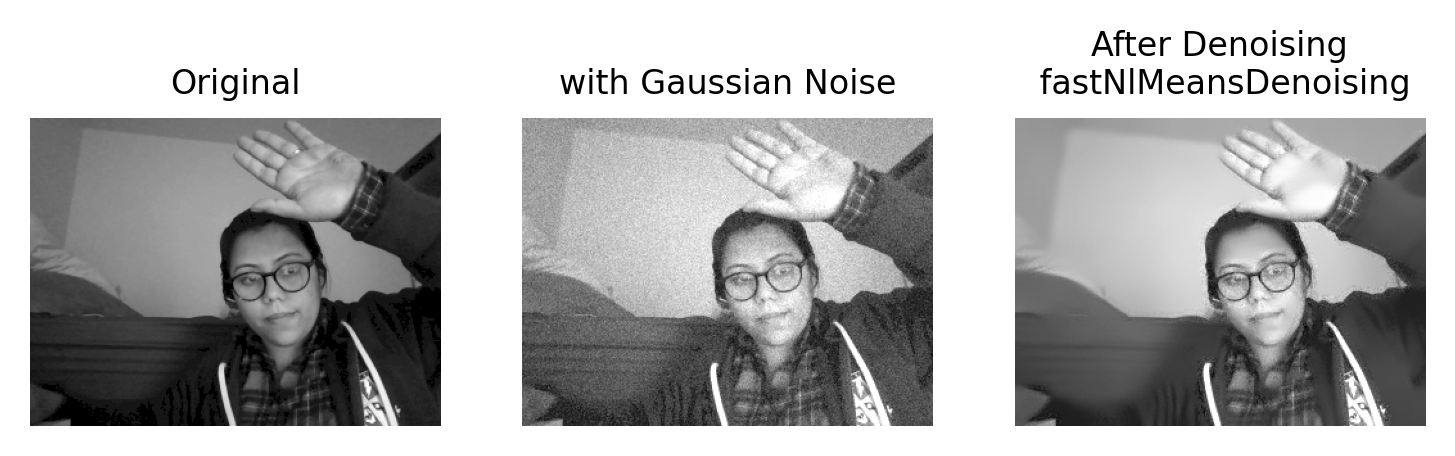

In [50]:
denoised1=cv2.fastNlMeansDenoising(gn_img,None,10,10)
denoising(img, gn_img , "with Gaussian Noise",denoised1, " fastNlMeansDenoising" )

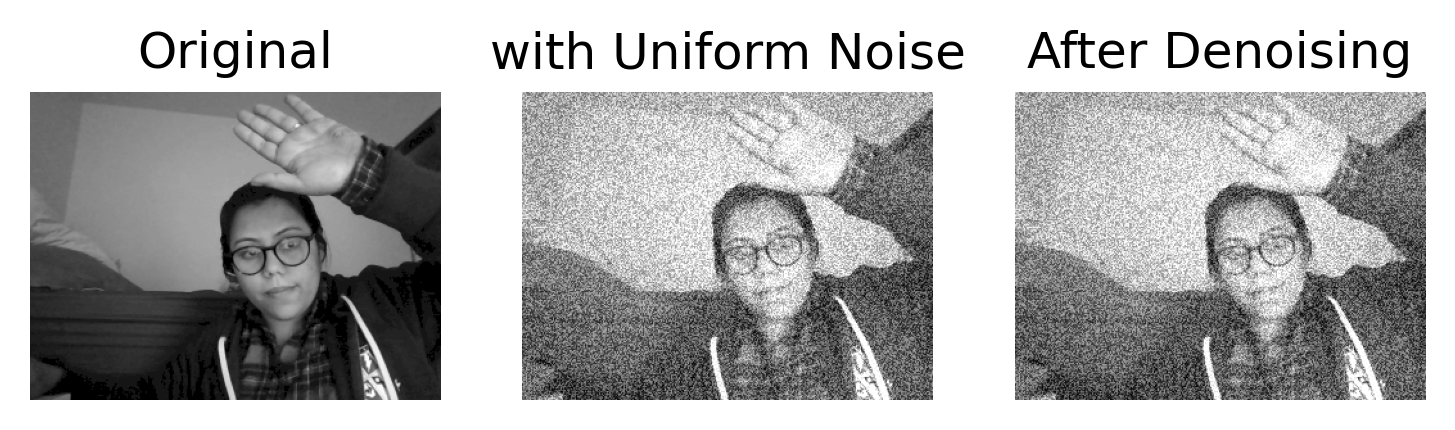

In [34]:
denoised2=cv2.fastNlMeansDenoising(un_img,None,10,10)
denoising(img, un_img , "with Uniform Noise",denoised2 )

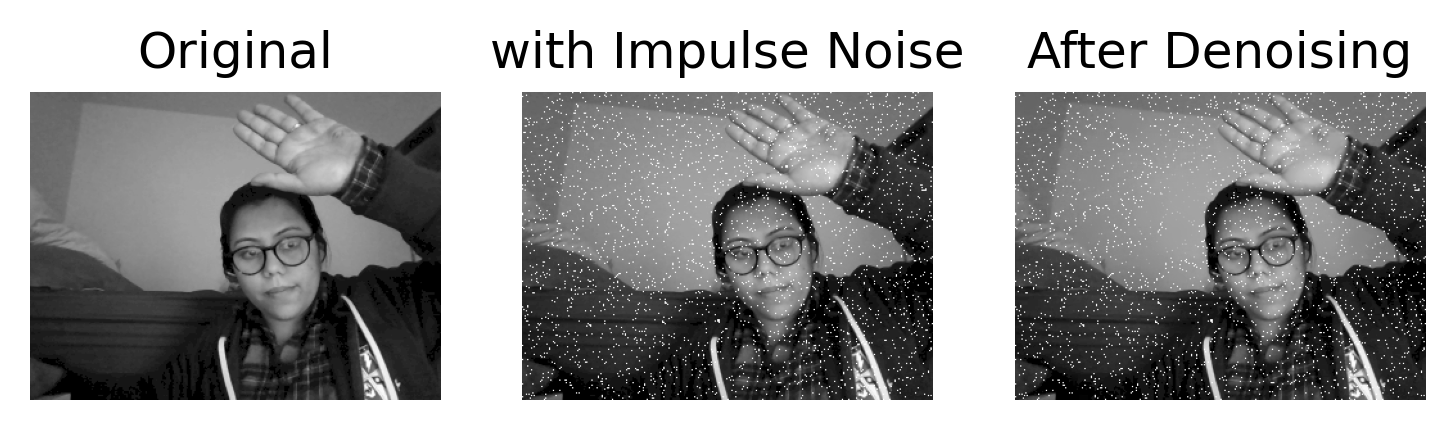

In [35]:
denoised3=cv2.fastNlMeansDenoising(in_img,None,10,10)
denoising(img, in_img , "with Impulse Noise",denoised3 )

## Median Blur

In [36]:
blurred1=cv2.medianBlur(gn_img,3)
blurred2=cv2.medianBlur(un_img,3)
blurred3=cv2.medianBlur(in_img,3)

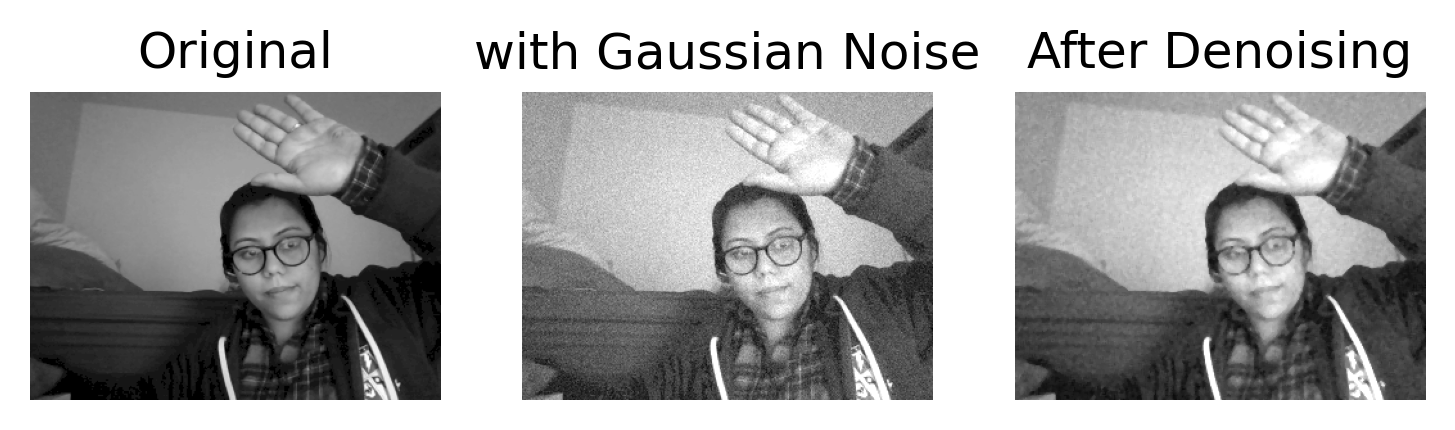

In [37]:
denoising(img, gn_img , "with Gaussian Noise",blurred1 )

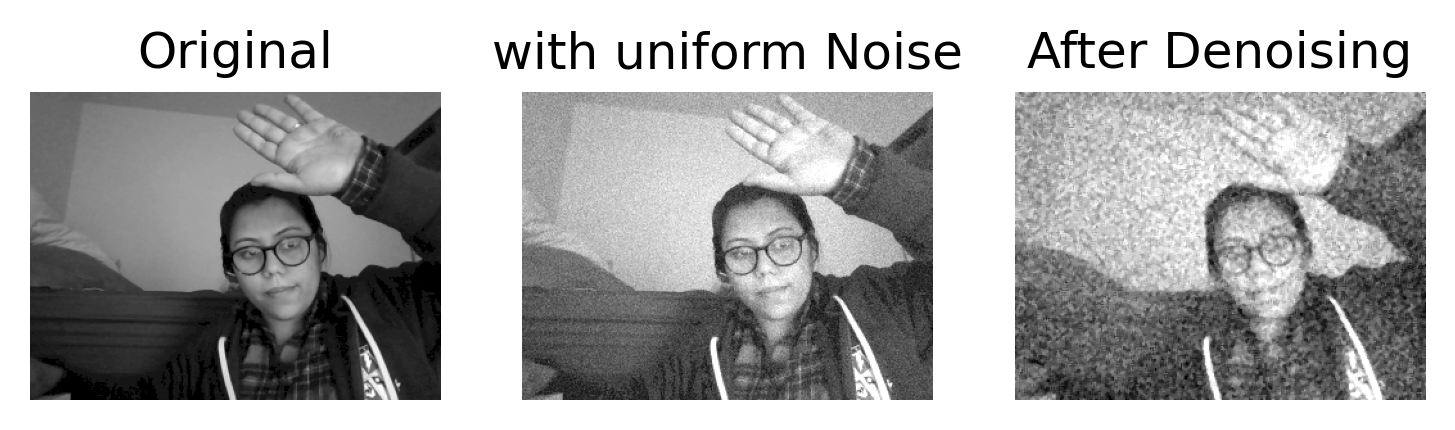

In [38]:
denoising(img, gn_img , "with uniform Noise",blurred2 )

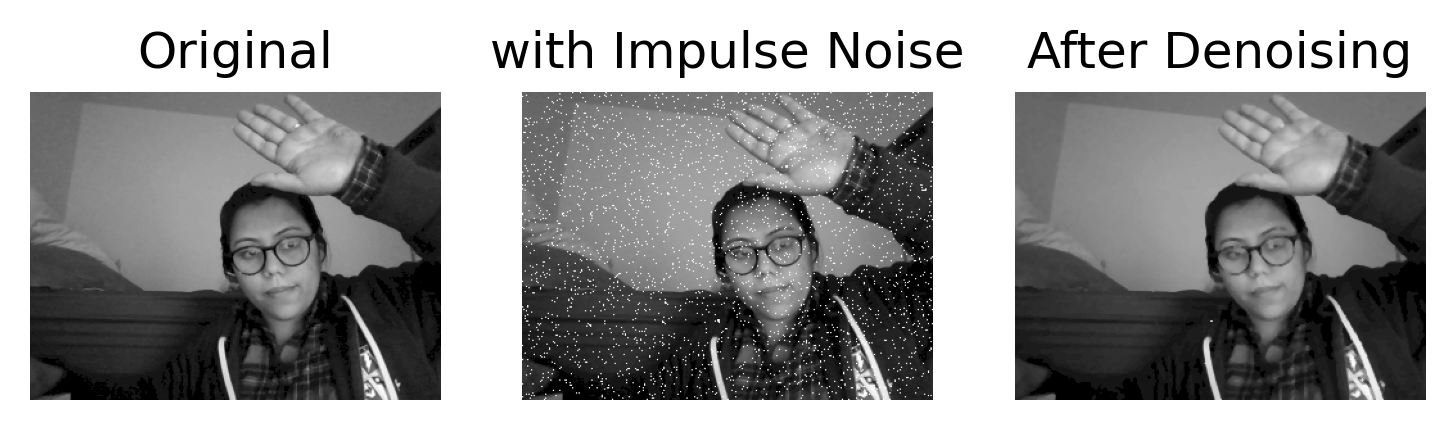

In [39]:
denoising(img, in_img , "with Impulse Noise",blurred3 )

## Gaussian Blur Denoising 

 Gaussian Kernel in place of a box filter. Effective against Gaussian Noise.

In [51]:
blurred1=cv2.GaussianBlur(gn_img,(3,3),0)
blurred2=cv2.GaussianBlur(un_img,(3,3),0)
blurred3=cv2.GaussianBlur(in_img,(3,3),0)

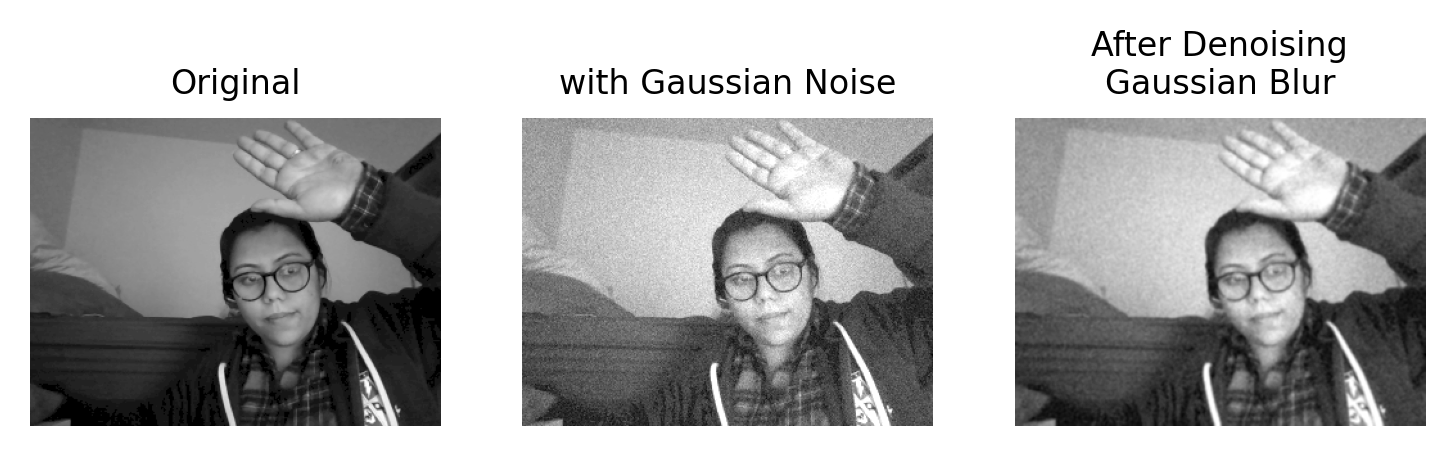

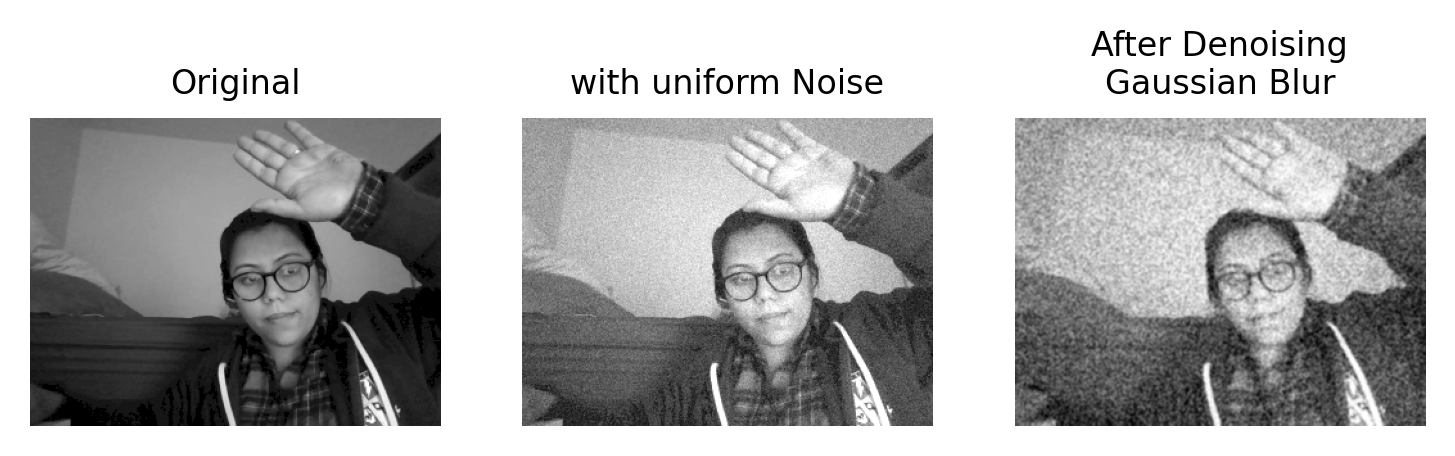

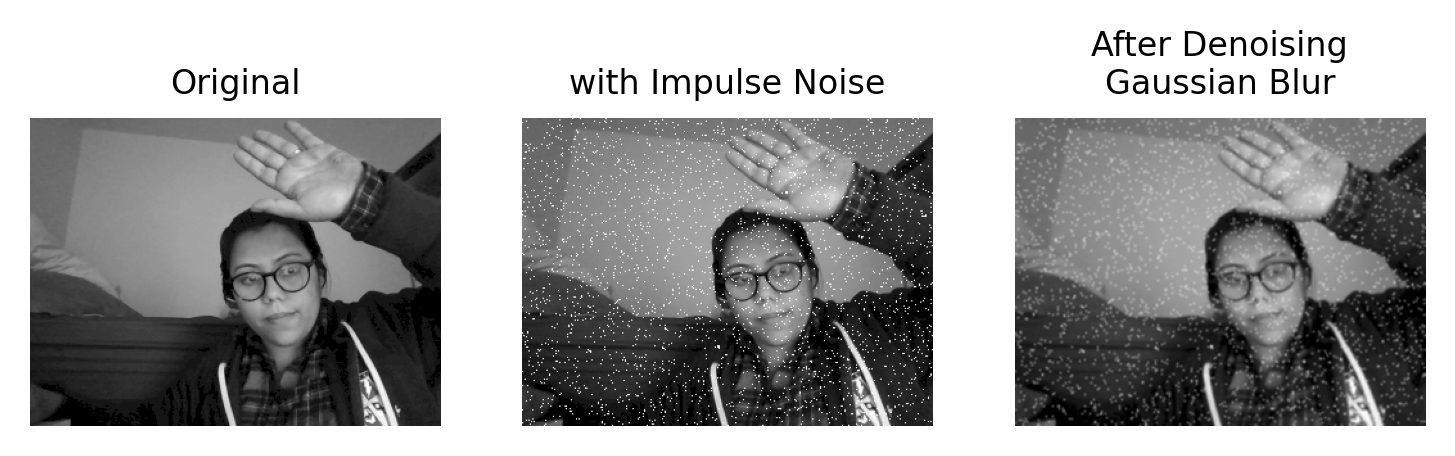

In [52]:
denoising(img, gn_img , "with Gaussian Noise",blurred1, "Gaussian Blur" )
denoising(img, gn_img , "with uniform Noise",blurred2, "Gaussian Blur" )
denoising(img, in_img , "with Impulse Noise",blurred3, "Gaussian Blur" )